<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#BF9774"><b>Decoding linguistic scarcity: semantic analysis of a ~10,000-entry  French lexical corpus.</b></div>
  <div style="color:#C3CBBE">A notebook conceived by <a href="https://github.com/brooks-code" style="color:#D97803">brkln.</a></div>
</div>

<div style="background-color: #F5E6D3; border-left: 5px solid #FFBC42; padding: 20px; margin: 20px 0; font-family: Georgia, serif; box-shadow: 0 4px 6px rgba(0,0,0,0.1); width: fit-content; max-width: 80%; margin-left: auto; margin-right: auto;">
    <blockquote style="background-color: #B78960; border-left: 5px solid #8B4513; font-style: italic; color: #5D4037; font-size: 1.2em; line-height: 1.6; margin-bottom: 15px; width: 95%;">
        "La curiosité excite le désir plus encore que le souvenir du plaisir."
    </blockquote>
    <div style="text-align: right; color: #6D4C41; font-weight: bold; font-family: 'Palatino Linotype', serif;">
        — Anatole France
    </div>
</div>

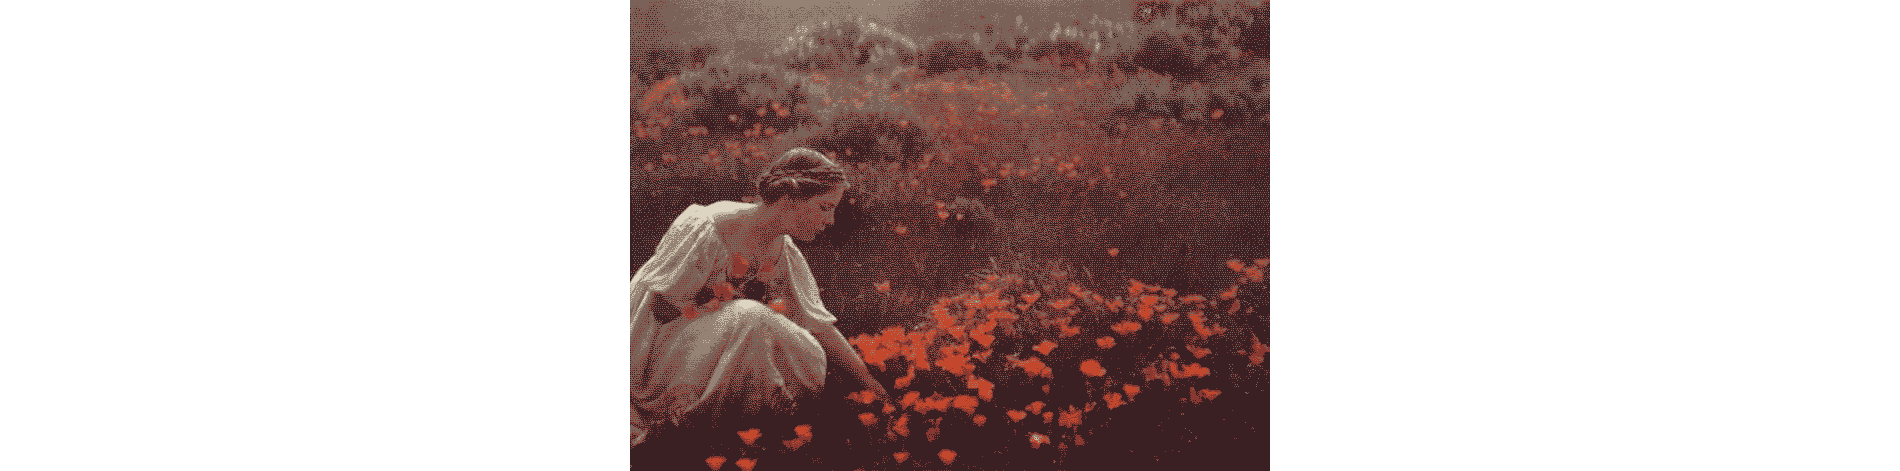

<div style="text-align:center">
Helen MacGowan Cooke picking California golden poppies - Autochrome by Arnold Genthe (USA, early 1910s).
</div>


This is a thorough exploration of [the uncommon french words](https://www.kaggle.com/datasets/grimespoint/french-unusual-words). I took this coding session as an opportunity to enrich my own NLP toolbox with tools I might use later on so this is not an extensive study but rather a fairly structured collection of curated computational linguistics methodologies I've always been curious about. I hope this project will inspire you to tinker further with the dataset. Feel free to have fun with it and **make it your own** somehow, and also, do not hesitate to leave some feedback, I'm eager to improve it!
 
Thanks, 

*brk*

# <a id='toc1_'></a>[Unusual french words dataset](#toc0_)

<div style="display:flex;justify-content:center;padding:10px 0;" aria-label="This dataset powers the dailyword terminal app, delivering you a fresh new word daily. Always 📙 + 🌠 = 💖 A(r)F">
  <div style="background:#fff8f0;border:1px solid #e7cab3;color:#4b2e14;padding:10px 12px;border-radius:10px;
              box-shadow:0 8px 16px rgba(75,46,20,0.06);font-family:system-ui,-apple-system,'Segoe UI',Roboto,Arial;
              display:flex;gap:12px;align-items:flex-start;max-width:760px;box-sizing:border-box;">
    <div style="width:36px;height:36px;display:flex;align-items:center;justify-content:center;color:#b85c1a;font-weight:700;font-size:20px;flex-shrink:0;">
      🐧
    </div>
    <div style="display:block;">
      <div style="margin:0;font-weight:700;color:#7a3b10;font-size:15px;line-height:1.6;">Linux user ?</div>
      <div style="margin:0;color:#3b2618;font-size:13.5px;line-height:1.6;">This dataset powers the dailyword terminal app!</div>
      <div style="margin:0;color:#5b3b2a;font-style:italic;font-size:12.5px;">
        <a href="https://github.com/brooks-code/fuzzy-carnival" target="_blank" rel="noopener noreferrer" style="color:#7a3b10;text-decoration:none;font-weight:600;">Discover it on GitHub</a>
      </div>
    </div>
  </div>
</div>

**Table of contents**<a id='toc0_'></a>    
- [Unusual french words dataset](#toc1_)    
  - [Setup](#toc1_1_)    
  - [Section 1 — General dataset overview](#toc1_2_)    
    - [1) Inspect first rows and a random sample](#toc1_2_1_)    
    - [2) Sanitize dataset](#toc1_2_2_)    
    - [3) Missingness and duplicates](#toc1_2_3_)    
    - [4) Word frequency description and values distribution](#toc1_2_4_)    
  - [Section 2 — Feature-Level EDA](#toc1_3_)    
    - [1) Word](#toc1_3_1_)    
      - [Validation](#toc1_3_1_1_)    
      - [Histograms of word lengths](#toc1_3_1_2_)    
      - [Character frequency](#toc1_3_1_3_)    
      - [First letter frequency distribution](#toc1_3_1_4_)    
    - [2) Gender](#toc1_3_2_)    
      - [Global overview](#toc1_3_2_1_)    
      - [Gender distribution split by word length.](#toc1_3_2_2_)    
      - [Statistical test (chi-square)](#toc1_3_2_3_)    
      - [Suffixes analysis](#toc1_3_2_4_)    
    - [3) frequency_index](#toc1_3_3_)    
      - [Correlation between word frequency, word length, and polysemy.](#toc1_3_3_1_)    
    - [4) base_form](#toc1_3_4_)    
      - [Inflectional variability](#toc1_3_4_1_)    
    - [5) Phonological form](#toc1_3_5_)    
    - [6) Definitions](#toc1_3_6_)    
      - [General statistics](#toc1_3_6_1_)    
      - [Most frequent characters](#toc1_3_6_2_)    
      - [More about polysemy](#toc1_3_6_3_)    
      - [Hypothesis: higher-frequency lemmas (words) exhibit greater polysemy](#toc1_3_6_4_)    
      - [Per gender and frequency bins summary table](#toc1_3_6_5_)    
      - [Hypernym detection](#toc1_3_6_6_)    
  - [Section 3 — Lexical / form-level analyses](#toc1_4_)    
    - [1) Affix studies](#toc1_4_1_)    
    - [2) N-Grams analysis](#toc1_4_2_)    
      - [N-grams global summary](#toc1_4_2_1_)    
      - [Character N-grams in word entries](#toc1_4_2_2_)    
    - [3) Orthographic complexity](#toc1_4_3_)    
      - [Neighbourhood density](#toc1_4_3_1_)    
      - [Orthographic complexity score](#toc1_4_3_2_)    
    - [4) Hyphenation / compound detection](#toc1_4_4_)    
    - [5) Regular vs irregular forms](#toc1_4_5_)    
    - [6) Phonotactic summarization](#toc1_4_6_)    
  - [Section 4 — Semantic analyses](#toc1_5_)    
    - [1) Common differentia terms](#toc1_5_1_)    
    - [2) Semantic field analysis](#toc1_5_2_)    
      - [Semantic field clustering with embeddings](#toc1_5_2_1_)    
      - [Gender and semantic associations](#toc1_5_2_2_)    
    - [3) Definition analysis](#toc1_5_3_)    
      - [Definition length & specificity metrics](#toc1_5_3_1_)    
      - [Collocation extraction in definitions](#toc1_5_3_2_)    
    - [4) Data integrity and outlier detection](#toc1_5_4_)    
      - [Outlier detection](#toc1_5_4_1_)    
      - [Provenance scoring](#toc1_5_4_2_)    
      - [Top-k lists](#toc1_5_4_3_)    
  - [Section 5 — Visualization & interactive tools](#toc1_6_)    
    - [1) Sankey diagram](#toc1_6_1_)    
    - [2) UMAP](#toc1_6_2_)    
    - [3) Interactive dashboard](#toc1_6_3_)    
  - [Section 6 — Review helpers and dataset export](#toc1_7_)    
    - [1) Quick QA checks recap](#toc1_7_1_)    
    - [2) Coverage & reliability metrics](#toc1_7_2_)    
    - [3) Export](#toc1_7_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

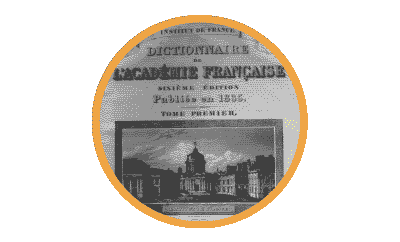

## <a id='toc1_1_'></a>[Setup](#toc0_)
- Install dependencies
- Import libraries
- Configuration

In [ ]:
# Execute once
%pip install pandas numpy seaborn scikit-learn sentence-transformers transformers Levenshtein nltk umap-learn spacy fr-core-news-sm plotly dash parquet pyarrow

In [ ]:
# Standard library
import os
import warnings
from collections import Counter, defaultdict
import re  # built-in regex engine

# Data manipulation
import pandas as pd
import numpy as np

# Statistical functions
from statistics import mean, median
from scipy.stats import chi2_contingency, pearsonr, t
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Text processing / NLP
import nltk
import spacy
import Levenshtein

# Feature extraction for text
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction & clustering
import umap
from sklearn.cluster import KMeans

# Nearest neighbors / similarity search
from sentence_transformers import SentenceTransformer, models
import torch

# Visualization - static
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Visualization - interactive
import plotly.express as px
import plotly.graph_objects as go

# Dashboarding / display
from dash import Dash, dcc, html, Input, Output, dash_table

# Data export
import pyarrow

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set_theme(style="whitegrid")

mpl.rcParams['figure.dpi'] = 72

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

EXPORT = True

## <a id='toc1_2_'></a>[Section 1 — General dataset overview](#toc0_)

In [4]:
# Load as strings to inspect raw entries
df = pd.read_csv('/kaggle/input/french-unusual-words/french_uncommon_words.csv', dtype=str)
df.shape

(9354, 6)

### <a id='toc1_2_1_'></a>[1) Inspect first rows and a random sample](#toc0_)

In [116]:
display(df.head())
display(df.sample(min(10, len(df)), random_state=1))

,word,gender,base_form,phonological_transcription,frequency_index,definitions
0,abaca,m,abaca,abaka,0.002,Bananier des Philippines de la famille des mus...
1,abaisse,f,abaisse,abEs,0.005,Morceau de pâte amincie avec un rouleau à pâti...
2,abaisse-langue,m,abaisse-langue,abEsl@g,0.115,"Instrument, en forme de palette, servant à aba..."
3,abalone,m,abalone,abalOn,0.029,Mollusque mangeable de la famille des Haliotidae.
4,abaque,m,abaque,abak,0.053,Compteur à boules chinois pour le calcul. | Ta...


,word,gender,base_form,phonological_transcription,frequency_index,definitions
822,baraterie,f,baraterie,baRat°Ri,0.002,"Droit maritime Sorte de malversation, de fraud..."
6257,palonnier,m,palonnier,palonje,0.055,Dispositif destiné à équilibrer les efforts (l...
82,addendum,m,addendum,ad5dOm,0.055,Ajout à un document juridique ou à un contrat....
3088,ensorceleuse,f,ensorceleur,@sORs°l2z,0.064,Personne ensorcelante. | Ensorcelant.
4589,inaccomplissement,m,inaccomplissement,inak§plis°m@,0.053,Manque d'accomplissement.
5689,monténégrin,m,monténégrin,m§tenegR5,0.053,Habitant du Monténégro. | Relatif au Monténégr...
7860,scientisme,m,scientisme,sj@tism,0.005,Doctrine selon lequel la connaissance scientif...
7451,réactif,m,réactif,Reaktif,0.231,Qui réagit ou fait réagir. | Electricité Qui r...
2045,conciliatrice,f,conciliateur,k§siljatRis,0.066,"Qui concilie, ou qui s'efforce de concilier."
2574,décélération,f,décélération,deseleRasj§,0.18,Diminution de l'accélération. | Diminution de ...


### <a id='toc1_2_2_'></a>[2) Sanitize dataset](#toc0_)

- `word` and `base_form`: trim extra spaces; None becomes the string "None" because of .astype(str) 
- `frequency_index`: numeric values preserved as float32.
- `gender`: empty strings replaced by NaN and dtype changed to category.

In [6]:
df['frequency_index'] = pd.to_numeric(
    df['frequency_index'], errors='coerce').astype('float32')
df['word'] = df['word'].astype(str).str.strip()
df['base_form'] = df['base_form'].astype(str).str.strip()
df['gender'] = df['gender'].replace({'': np.nan}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9354 entries, 0 to 9353
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   word                    9354 non-null   object  
 1   gender                  8833 non-null   category
 2   base_form               9354 non-null   object  
 3   phonetic_transcription  9354 non-null   object  
 4   frequency_index         9354 non-null   float32 
 5   definitions             9354 non-null   object  
dtypes: category(1), float32(1), object(4)
memory usage: 338.2+ KB


### <a id='toc1_2_3_'></a>[3) Missingness and duplicates](#toc0_)

In [118]:
print("\nMissing values per column:")
print(df.isna().sum())
print("\nDuplicate rows (exact):", df.duplicated().sum())
print("\nDuplicate words (same orthography):", df['word'].duplicated().sum())


Missing values per column:
word                            0
gender                        521
base_form                       0
phonological_transcription      0
frequency_index                 0
definitions                     0
dtype: int64

Duplicate rows (exact): 0

Duplicate words (same orthography): 3


521 word entries have an **unassigned gender**.

Let's find out the duplicate word entries and drop them in the two cells below:

In [119]:
duplicate_words = df[df['word'].duplicated(keep=False)]['word']
print(duplicate_words.unique())

['fontanelle' 'sorbonne' 'vespasienne']


In [120]:
df = df.drop_duplicates(subset='word', keep='first')

### <a id='toc1_2_4_'></a>[4) Word frequency description and values distribution](#toc0_)

In [121]:
df['frequency_index'].describe()

count    9351.000000
mean        0.127894
std         0.109844
min         0.002000
25%         0.053000
50%         0.103000
75%         0.202000
max         0.400000
Name: frequency_index, dtype: float64

Most words have a low frequency (around 0.05–0.20).
- **Central tendency**: median (50%) = 0.103, mean = 0.1279. Mean > median → slight right skew (a few higher values pull the mean up).
- **Skewness** implication: positive skew — many low-frequency items and fewer higher-frequency ones. This is typical for frequency-like metrics (long-tail behavior).

Let's visualize this below:

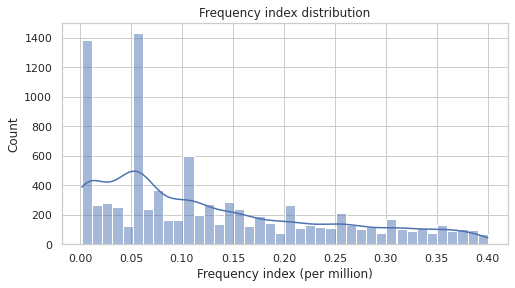

In [122]:
plt.figure(figsize=(8, 4))
df = df.copy()
df['frequency_index'] = df['frequency_index'].replace([np.inf, -np.inf], np.nan)
sns.histplot(df['frequency_index'].dropna(), bins=40, kde=True)
plt.xlabel('Frequency index (per million)')
plt.title('Frequency index distribution')
plt.show()

## <a id='toc1_3_'></a>[Section 2 — Feature-Level EDA](#toc0_)

### <a id='toc1_3_1_'></a>[1) Word](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Validation](#toc0_)

Compute word lengths and verify allowed characters (letters, diacritics, hyphen).

In [13]:
df['word_len'] = df['word'].str.len()
# Regex pattern matching letters (including accented ones) and hyphens - more restrictive
# pattern = r'^[A-Za-zéÉàÀâÂêÊîÎôÔûÛ\-]+$'
# df['word_alpha'] = df['word'].apply(lambda w: bool(re.match(pattern, w)))

# Allow any Unicode letters plus hyphens
df['word_alpha'] = df['word'].fillna('').apply(
    lambda w: w.replace('-', '').isalpha())

display(df[['word_len']].describe(), df[['word', 'word_alpha']
                                        ].describe(include=['object', 'bool', 'category']))

,word_len
count,9354.000000
mean,8.938636
std,2.713182
min,4.000000
25%,7.000000
50%,9.000000
75%,11.000000
max,24.000000


,word,word_alpha
count,9354,9354
unique,9351,2
top,fontanelle,True
freq,2,9306


`word_alpha` is a boolean flag indicating whether a token in `df['word']` consists only of alphabetic letters (including the specified accented letters) and hyphens, according to the regex. It shows 2 unique values for word_alpha (True/False) and counts: 9303 True, so 48 entries are False.

In [124]:
sampled_alpha = df[df['word_alpha'] == False].sample(n=5, random_state=None)
sampled_alpha

,word,gender,base_form,phonological_transcription,frequency_index,definitions,word_len,word_alpha
926,bernard-l'ermite,m,bernard-l'ermite,bERnaRlERmit,0.255,Petit crustacé qui se loge d'ordinaire dans un...,16,False
4585,in pace,m,in pace,inpas,0.092,Endroit évoquant l'idée d'une prison.,7,False
176,agnus dei,m,agnus dei,agnusdei,0.222,"Liturgie Moment de la messe où le prêtre, se f...",9,False
7750,san francisco,NaN,san francisco,s@fR@sisko,0.058,ville de la Californie aux États-Unis.,13,False
60,acid jazz,m,acid jazz,asiddZaz,0.008,"Genre musical combinant des éléments du jazz, ...",9,False


Most of the flagged entries are bigrams (two consecutive words), some others are contractions (e.g. *mam'selle*).

#### <a id='toc1_3_1_2_'></a>[Histograms of word lengths](#toc0_)

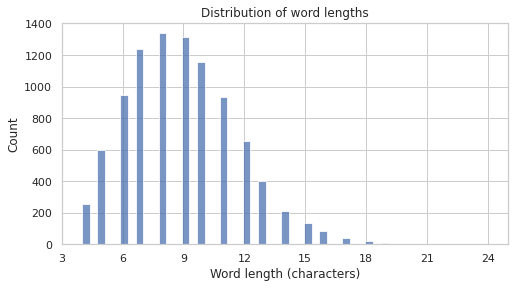

In [125]:
df = df.copy()
df['word_len'] = df['word_len'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(8, 4))
sns.histplot(df['word_len'].dropna())
plt.xlabel('Word length (characters)')
plt.title('Distribution of word lengths')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

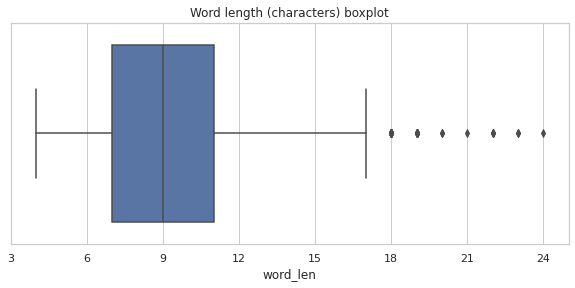

In [126]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['word_len'])
plt.title('Word length (characters) boxplot')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


The distribution of word lengths, highlights a central tendency around 9 characters, most of the data points are concentrated between 7 and 11 while the data ranges from 3 to 24 characters long word entries.

#### <a id='toc1_3_1_3_'></a>[Character frequency](#toc0_)

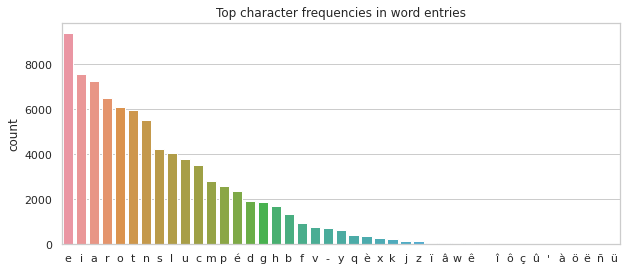

In [127]:
all_chars = Counter("".join(df['word'].dropna().tolist()))
char_df = pd.DataFrame.from_dict(all_chars, orient='index', columns=[
                                 'count']).sort_values('count', ascending=False).head(50)
plt.figure(figsize=(10, 4))
sns.barplot(x=char_df.index, y='count', data=char_df)
plt.title('Top character frequencies in word entries')
plt.show()

#### <a id='toc1_3_1_4_'></a>[First letter frequency distribution](#toc0_)

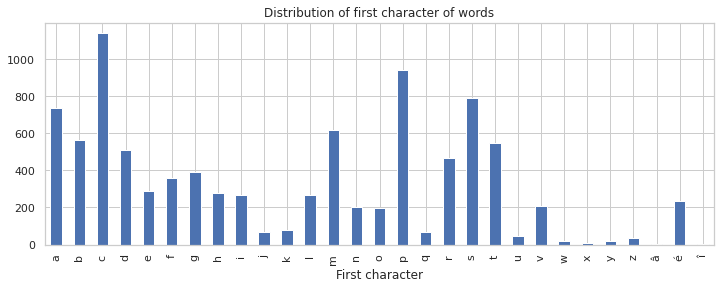

In [128]:
df['first_letter'] = df['word'].str[0]
first_counts = df['first_letter'].value_counts().sort_index()
plt.figure(figsize=(12, 4))
first_counts.plot(kind='bar')
plt.xlabel('First character')
plt.title('Distribution of first character of words')
plt.show()

<div style="display:flex;justify-content:center;padding:12px 0;">
  <div role="group" aria-label="Going further — Identify relevant resources to analyze how the shown distributions compare to those of the French language on a global scale."
       style="display:flex;align-items:flex-start;gap:12px;background:linear-gradient(180deg,#fff7ef,#fff0e6);
              color:#4b2e14;border:1px solid #e6c8b0;padding:12px 16px;border-radius:12px;
              box-shadow:0 10px 20px rgba(75,46,20,0.08);font-family:system-ui,-apple-system,'Segoe UI',Roboto,Arial;
              cursor:default;max-width:760px;text-align:left;box-sizing:border-box;">
    <div style="width:34px;height:34px;display:flex;align-items:center;justify-content:center;
                color:#b85c1a;font-weight:700;font-size:20px;flex-shrink:0;line-height:1;">❓</div>
    <div style="display:flex;flex-direction:column;min-width:0;flex:1;gap:6px;">
      <div style="margin:0;font-weight:600;color:#7a3b10;font-size:15px;line-height:1;text-align:left;">
        Going further
      </div>
      <div style="margin:0;color:#3b2618;font-size:14px;line-height:1.25;text-align:left;">
        Identify relevant resources to analyze how the shown distributions compare to those of the French language on a global scale.
      </div>
    </div>
  </div>
</div>


### <a id='toc1_3_2_'></a>[2) Gender](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Global overview](#toc0_)

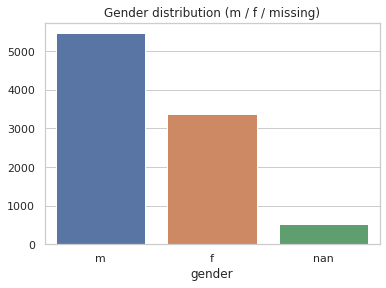

In [129]:
gender_counts = df['gender'].value_counts(dropna=False)
gender_counts
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index.astype(str), y=gender_counts.values)
plt.title('Gender distribution (m / f / missing)')
plt.show()

The overrepresentation of masculine words might introduce bias into the analysis.

#### <a id='toc1_3_2_2_'></a>[Gender distribution split by word length.](#toc0_)

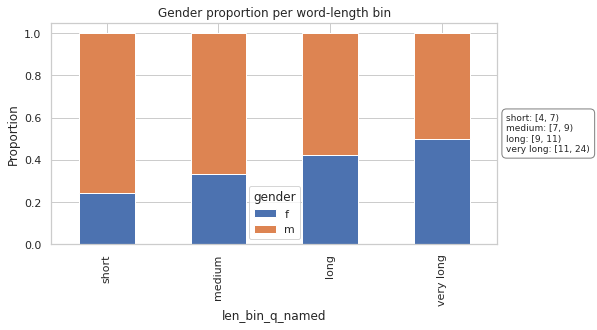

In [130]:
quantiles = df['word_len'].quantile([0, .25, .5, .75, 1.0]).values
labels = ['short', 'medium', 'long', 'very long']
df['len_bin_q_named'] = pd.cut(
    df['word_len'], bins=quantiles, labels=labels, include_lowest=True, right=False)

# Human-readable range strings for the legend
range_labels = []
for i in range(len(quantiles)-1):
    lo = int(np.floor(quantiles[i]))
    hi = int(np.ceil(quantiles[i+1]))
    # Use closed/open notation consistent with pd.cut(right=False): [lo, hi)
    range_labels.append(f"{labels[i]}: [{lo}, {hi})")

cross = pd.crosstab(df['len_bin_q_named'], df['gender'], normalize='index')
ax = cross.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.ylabel('Proportion')
plt.title('Gender proportion per word-length bin')

# Custom legend for the length ranges
legend_text = "\n".join(range_labels)
plt.gca().text(1.02, 0.5, legend_text, transform=ax.transAxes,
               fontsize=9, verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray"))

plt.show()

#### <a id='toc1_3_2_3_'></a>[Statistical test (chi-square)](#toc0_)

In [131]:
ct = pd.crosstab(df['len_bin_q_named'], df['gender'])
chi2, p, dof, ex = chi2_contingency(ct.fillna(0))
chi2, p

(313.6576615873166, 1.1006525552029809e-67)

A **high Chi-squared value** (313) indicates a significant difference between the observed and expected frequencies of the categories suggesting that there is a strong relationship between word length and gender.

The **p-value is extremely small** (close to zero), which indicates that the likelihood of observing this level of association purely by chance is very low (typically, a p-value threshold of 0.05 is used). There is a statistically significant association between word length and gender.

#### <a id='toc1_3_2_4_'></a>[Suffixes analysis](#toc0_)

Suffix (endings) patterns often correlate with gender in many languages.

In [132]:
def top_suffixes_by_gender(df, ks=(2, 3, 4), top_n=10, gender_col='gender', word_col='word'):
    results = {}
    for k in ks:
        suf_col = f'suf{k}'
        df[suf_col] = df[word_col].str[-k:].fillna('')
        ct = pd.crosstab(df[suf_col], df[gender_col]).astype(int)
        genders = ct.columns.tolist()
        rows = []
        for g in genders:
            top = ct.sort_values(by=g, ascending=False).head(top_n)[
                [g]].reset_index()
            top.columns = [suf_col, 'count']
            top['gender'] = g
            # Use sum of top_n counts for this gender as the denominator
            top_total = top['count'].sum()
            if top_total == 0:
                top['percent'] = 0.0
            else:
                top['percent'] = (top['count'] / top_total * 100).round(2)
            top['rank'] = range(1, len(top) + 1)
            rows.append(top[['rank', suf_col, 'gender', 'count', 'percent']])
        results[k] = pd.concat(rows, ignore_index=True)
    return results


results = top_suffixes_by_gender(df, ks=[2, 3, 4], top_n=10)
for k, table in results.items():
    print(
        f"\nTop {10} suffixes by gender for k={k} (percent = % of that gender's total for this k):")
    display(table)


Top 10 suffixes by gender for k=2 (percent = % of that gender's total for this k):


,rank,suf2,gender,count,percent
0,1,ie,f,626,22.03
1,2,on,f,415,14.60
2,3,te,f,321,11.29
3,4,se,f,310,10.91
4,5,ne,f,293,10.31
5,6,re,f,245,8.62
6,7,le,f,200,7.04
7,8,té,f,158,5.56
8,9,ce,f,147,5.17
9,10,de,f,127,4.47



Top 10 suffixes by gender for k=3 (percent = % of that gender's total for this k):


,rank,suf3,gender,count,percent
0,1,ion,f,395,25.42
1,2,rie,f,166,10.68
2,3,ine,f,157,10.10
3,4,tte,f,149,9.59
4,5,ité,f,144,9.27
5,6,use,f,118,7.59
6,7,ère,f,111,7.14
7,8,nce,f,110,7.08
8,9,gie,f,106,6.82
9,10,lle,f,98,6.31



Top 10 suffixes by gender for k=4 (percent = % of that gender's total for this k):


,rank,suf4,gender,count,percent
0,1,tion,f,350,31.56
1,2,erie,f,137,12.35
2,3,ette,f,122,11.00
3,4,euse,f,109,9.83
4,5,ogie,f,87,7.84
5,6,ière,f,81,7.30
6,7,ique,f,57,5.14
7,8,ence,f,57,5.14
8,9,lité,f,56,5.05
9,10,phie,f,53,4.78


### <a id='toc1_3_3_'></a>[3) frequency_index](#toc0_)

Visualize distribution and compute central tendency.

In [7]:
mn = df['frequency_index'].min()
mx = df['frequency_index'].max()
edges = np.linspace(mn, mx, 5)  # 4 bins -> 5 edges

labels = [
    f"very rare [{edges[0]:.3g}, {edges[1]:.3g})",
    f"rare [{edges[1]:.3g}, {edges[2]:.3g})",
    f"scarce [{edges[2]:.3g}, {edges[3]:.3g})",
    f"uncommon [{edges[3]:.3g}, {edges[4]:.3g}]"
]

df['freq_bin_lin'] = pd.cut(df['frequency_index'],
                            bins=edges,
                            labels=labels,
                            include_lowest=True,
                            right=False)

print(df['freq_bin_lin'].value_counts().reindex(labels))

freq_bin_lin
very rare [0.002, 0.101)    4672
rare [0.101, 0.201)         2275
scarce [0.201, 0.301)       1368
uncommon [0.301, 0.4]       1027
Name: count, dtype: int64


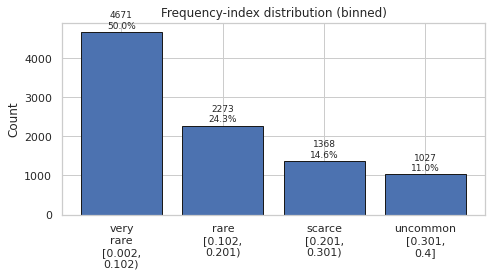

In [134]:
counts = df['freq_bin_lin'].value_counts().reindex(
    labels)  # ensure label order
pct = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(labels, counts, color='C0', edgecolor='k')
ax.set_ylabel('Count')
ax.set_title('Frequency-index distribution (binned)')

# Annotate counts and percentages
for rect, c, p in zip(bars, counts, pct):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + max(counts)*0.01,
            f'{int(c)}\n{p:.1f}%', ha='center', va='bottom', fontsize=9)

wrapped = [l.replace(' ', '\n') for l in labels]
ax.set_xticks([rect.get_x() + rect.get_width()/2 for rect in bars])
ax.set_xticklabels(wrapped, rotation=0, ha='center')

plt.tight_layout()
plt.show()

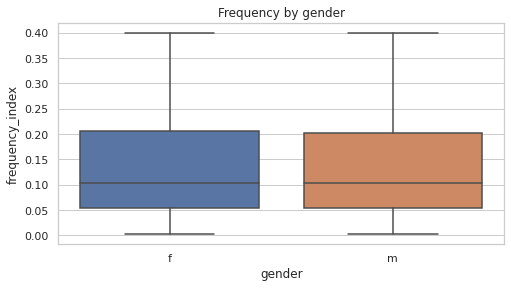

In [135]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='gender', y='frequency_index',
            data=df, orient='v')
plt.title('Frequency by gender')
# plt.yscale('log')
plt.show()

There is no meaningful difference across genders. However, the distribution of `frequency_index` is skewed: scarce and uncommon tokens (0.201 to 0.4 occurences per million) are underrepresented, indicating class imbalance across frequency bins that could bias downstream models.

#### <a id='toc1_3_3_1_'></a>[Correlation between word frequency, word length, and polysemy.](#toc0_)

In [14]:
# polysemy (number of defs)
df['num_senses'] = df['definitions'].fillna('').apply(
    lambda s: 0 if s == '' else len([x for x in s.split('|') if x.strip() != '']))
corr_len_freq = df[['word_len', 'frequency_index', 'num_senses']].corr()
corr_len_freq

,word_len,frequency_index,num_senses
word_len,1.000000,-0.067696,-0.079541
frequency_index,-0.067696,1.000000,0.122003
num_senses,-0.079541,0.122003,1.000000


Interpretation of the correlation matrix (Pearson correlations):

`word_len` vs `frequency_index`: **-0.0677**
- Very small negative correlation. Longer words tend to have slightly lower frequency_index, but *the relationship is negligible*.

`word_len` vs `num_senses`: **-0.0796**  
- Very small negative correlation. Longer words have a marginal tendency to have fewer senses, but *effect size is negligible*.

`frequency_index` vs `num_senses`: **0.1220**
- Small positive correlation. More frequent words tend to have slightly more senses (higher polysemy), but *the relationship is weak*.


### <a id='toc1_3_4_'></a>[4) base_form](#toc0_)

#### <a id='toc1_3_4_1_'></a>[Inflectional variability](#toc0_)

In [137]:
display(df[['word', 'base_form']].head(5))
mismatch = df[df['word'] != df['base_form']]
print("Proportion mismatching word vs base_form:", len(mismatch)/len(df))
mismatch.head(5)

,word,base_form
0,abaca,abaca
1,abaisse,abaisse
2,abaisse-langue,abaisse-langue
3,abalone,abalone
4,abaque,abaque


Proportion mismatching word vs base_form: 0.04138594802694899


,word,gender,base_form,phonological_transcription,frequency_index,definitions,word_len,word_alpha,first_letter,len_bin_q_named,suf2,suf3,suf4,freq_bin_lin,num_senses
99,administrée,f,administré,administRe,0.314,Qui est administré.,11,True,a,very long,ée,rée,trée,"uncommon [0.301, 0.4]",1
107,adoptée,f,adopté,adOpte,0.272,Participe passé de « adopter ».,7,True,a,medium,ée,tée,ptée,"scarce [0.201, 0.301)",1
139,affiliée,f,affilié,afilje,0.198,Participant à une affiliation.,8,True,a,medium,ée,iée,liée,"rare [0.102, 0.201)",1
146,afghane,f,afghan,afgan,0.251,Langue indo-européenne du groupe iranien-orien...,7,True,a,medium,ne,ane,hane,"scarce [0.201, 0.301)",3
152,afro-américaine,f,afro-américain,afRoameRikEn,0.130,Noir habitant les États-Unis. | Relatif aux ci...,15,True,a,very long,ne,ine,aine,"rare [0.102, 0.201)",2


The **base form** of a word (lemma) is its canonical dictionary form — the uninflected form from which inflected variants (e.g., tenses, plurals) are derived. In this dataset, ≈ 4% of the words differ from their base form.

Inflectional variability is the extent to which a lexical item occurs in different inflected forms across a corpus or language. It measures how many different forms of each base form exist (morphological variants like tense/person/number/case/gender/degree, etc.).

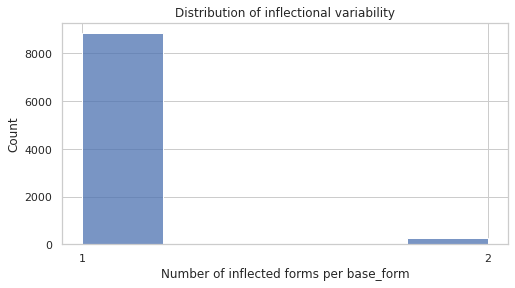

In [138]:
gcounts = df.groupby('base_form')[
    'word'].nunique().sort_values(ascending=False)
# ensure numeric
gcounts = pd.to_numeric(gcounts, errors='coerce')
gcounts = gcounts.replace([np.inf, -np.inf], np.nan).dropna()   # remove infs
x = gcounts[gcounts.notna()]

plt.figure(figsize=(8, 4))
sns.histplot(x, bins=5)
plt.xlabel('Number of inflected forms per base_form')
plt.title('Distribution of inflectional variability')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

There is no significant inflectional variability in this dataset.

### <a id='toc1_3_5_'></a>[5) Phonological form](#toc0_)

Phonetic transcription differ from the phonological form. The phonological form is typically more abstract and symbolic, while phonetic transcription often uses standard notations (IPA). The entries used in this dataset were derived using the LAIPTSS software. This software applies a core set of 500 grapheme-to-phoneme conversion rules; the remainder was processed [manually](http://openlexicon.fr/datasets-info/Lexique382/Manuel_Lexique3.html#__RefHeading___Toc152122370) by the researchers.

This feature won't be analyzed in detail in this notebook.

### <a id='toc1_3_6_'></a>[6) Definitions](#toc0_)

#### <a id='toc1_3_6_1_'></a>[General statistics](#toc0_)

In [139]:
df['definitions'] = df['definitions'].fillna('')
df['num_senses'] = df['definitions'].apply(lambda s: 0 if s.strip(
) == '' else len([p for p in s.split('|') if p.strip() != '']))
df['num_senses'].describe()

count    9351.000000
mean        1.650198
std         1.539039
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        80.000000
Name: num_senses, dtype: float64

A max value of 80 is **suspicious**!

In [140]:
max_senses = int(df['num_senses'].max())
print("max num_senses =", max_senses)

rows_with_max = df[df['num_senses'] == max_senses]
display(rows_with_max[['word', 'definitions',
        'num_senses']].reset_index(drop=True))

for _, r in rows_with_max[['word', 'definitions']].iterrows():
    print("\nWord:", r['word'])
    for i, sense in enumerate([p.strip() for p in r['definitions'].split('|') if p.strip() != ''], 1):
        print(f" {i}. {sense}")

max num_senses = 80


,word,definitions,num_senses
0,stéphanois,"Relatif à La Chapelle-Saint-Étienne, commune f...",80



Word: stéphanois
 1. Relatif à La Chapelle-Saint-Étienne, commune française située dans le département des Deux-Sèvres.
 2. Relatif à Russ, commune française située dans le département du Bas-Rhin.
 3. Relatif à Saint-Estèphe, commune française située dans le département de la Gironde.
 4. Relatif à Saint-Estève, commune française située dans le département des Pyrénées-Orientales.
 5. Relatif à Saint-Étienne, commune française située dans le département de la Loire.
 6. Relatif à Saint-Étienne-au-Mont, commune française située dans le département du Pas-de-Calais.
 7. Relatif à Saint-Étienne-au-Temple, commune française située dans le département de la Marne.
 8. Relatif à Saint-Étienne-de-Brillouet, commune française située dans le département de la Vendée.
 9. Relatif à Saint-Étienne-de-Chigny, commune françai]e, située dans le département de l'Indre-et-Loire.
 10. Relatif à Saint-Étienne-de-Chomeil, commune française située dans le département du Cantal.
 11. Relatif à Saint-Étien

...But it's a valid listing of *Saint-Étienne-**variant*** towns :D

In [141]:
df.sort_values('num_senses', ascending=False)[
    ['word', 'num_senses', 'definitions']].head(10)

,word,num_senses,definitions
8292,stéphanois,80,"Relatif à La Chapelle-Saint-Étienne, commune f..."
2847,donner,42,"Faire un don ; transférer, sans rétribution, l..."
6129,oratorien,23,Membre de la congrégation de l'Oratoire. | Rel...
212,aixois,22,"Habitant d'Aix, commune française située dans ..."
9191,victoria,21,Carrosserie Voiture hippomobile découverte à q...
1899,clermontois,20,"Habitant de Clermont, commune française située..."
963,bénédictine,19,"Religieux, religieuse de l'ordre de Saint-Beno..."
962,bénédictin,19,"Religieux, religieuse de l'ordre de Saint-Beno..."
1978,colombin,18,"Colombine, fiente de pigeon ou de volaille. | ..."
8944,triton,16,"Figure imaginaire, constituée d'un homme barbu..."


Interesting: most polysemous senses tend to be spatial/location-related.

#### <a id='toc1_3_6_2_'></a>[Most frequent characters](#toc0_)

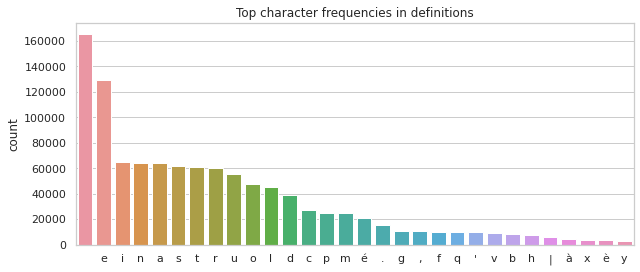

In [142]:
# Not normalized!
def_chars = Counter("".join(df['definitions'].dropna().tolist()))
sense_char_df = pd.DataFrame.from_dict(def_chars, orient='index', columns=[
                                 'count']).sort_values('count', ascending=False).head(30)
plt.figure(figsize=(10, 4))
sns.barplot(x=sense_char_df.index, y='count', data=sense_char_df)
plt.title('Top character frequencies in definitions')
plt.show()

n.b. First bar is *whitespaces* : U+0020 :)

#### <a id='toc1_3_6_3_'></a>[More about polysemy](#toc0_)

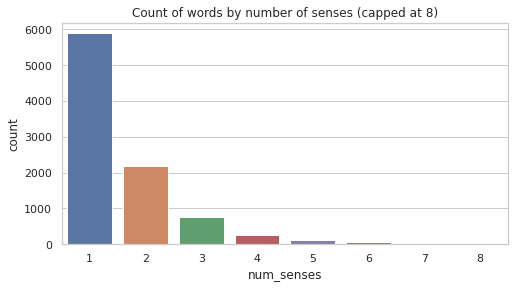

In [143]:
cap = 8
plt.figure(figsize=(8, 4))
sns.countplot(x='num_senses', data=df[df['num_senses'] <= cap])
plt.title(f'Count of words by number of senses (capped at {cap})')
plt.show()

The decrease is rapid at first (from almost 6000 counts for 1 sense to around 2000 for 2 senses) and then becomes less steep. It could be interesting to find out if it follows a specific mathematical distribution.

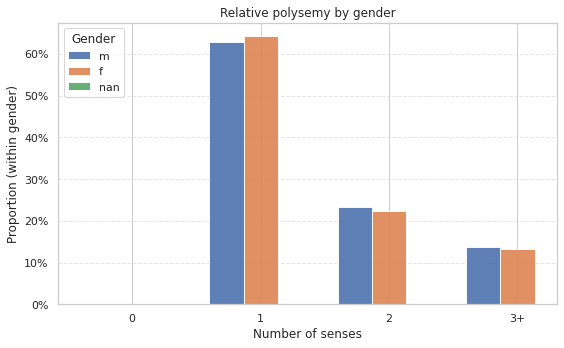

In [144]:
df['senses_cat'] = df['num_senses'].clip(
    upper=3).replace({3: '3+'}).astype(str)
cats = ['0', '1', '2', '3+']
genders = df['gender'].unique().tolist()
colors = {'male': 'C0', 'female': 'C1'}

# Compute proportions per gender
prop = {}
for g in genders:
    counts = df.loc[df['gender'] == g,
                    'senses_cat'].value_counts().reindex(cats, fill_value=0)
    prop[g] = counts / counts.sum()

x = np.arange(len(cats))
width = 0.8 / len(genders)

fig, ax = plt.subplots(figsize=(8, 5))
for i, g in enumerate(genders):
    ax.bar(x + i*width - (width*(len(genders)-1)/2), prop[g].values, width=width,
           label=g, color=colors.get(g, None), alpha=0.9)

ax.set_xlabel('Number of senses')
ax.set_ylabel('Proportion (within gender)')
ax.set_title('Relative polysemy by gender')
ax.set_xticks(x)
ax.set_xticklabels(cats)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.legend(title='Gender')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

`gender` shows no association with sense count.

#### <a id='toc1_3_6_4_'></a>[Hypothesis: higher-frequency lemmas (words) exhibit greater polysemy](#toc0_)

Visual inspection with three plots:
- A **scatterplot** shows raw point-level relationship and dispersion, it reveals heteroskedasticity, outliers and the discrete nature of num_senses.
- **Violin + jittered points** show per-bin distribution shape (density), central tendency (quartiles) and per-item variability; points show pointwise spread and potential multimodality.
- **A boxplot (log scale)** to compare central tendency and IQR across bins while mitigating skew by logging counts; makes small differences in medians/means clearer.

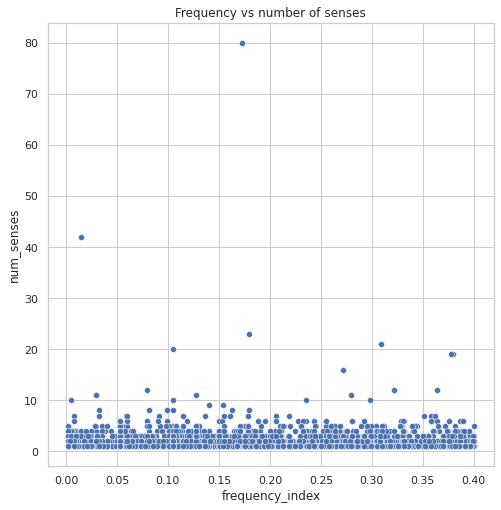

In [145]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='frequency_index', y='num_senses',
                data=df.sample(min(5000, len(df)), random_state=1))
# plt.xscale('log')
plt.title('Frequency vs number of senses')
plt.tight_layout
plt.show()

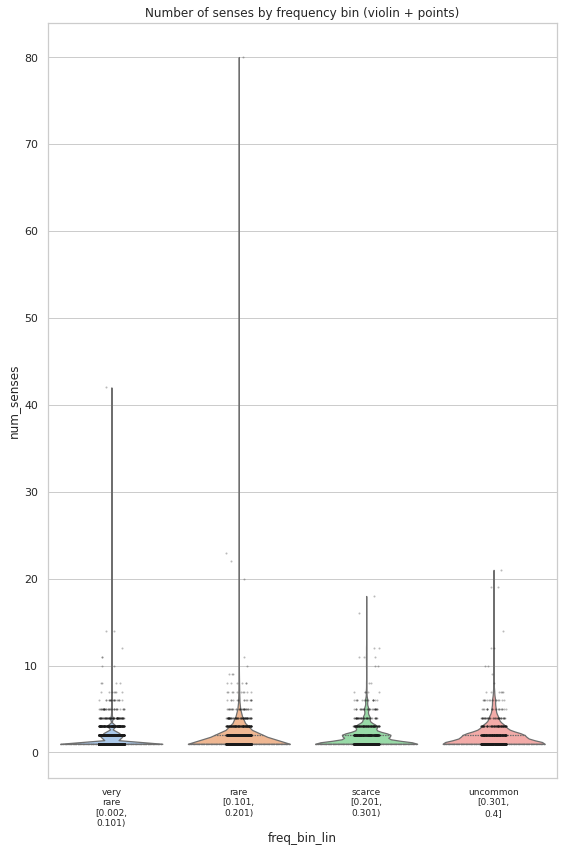

In [12]:
df = df.copy()
# convert inf to NaN for relevant cols
df['num_senses'] = df['num_senses'].replace([np.inf, -np.inf], np.nan)
df['freq_bin_lin'] = df['freq_bin_lin'].astype(
    'category')  # ensure categorical

plt.figure(figsize=(8, 12))
ax = sns.violinplot(
    x='freq_bin_lin', y='num_senses', data=df,
    cut=0, inner='quartile', hue='freq_bin_lin', palette='pastel',
    legend=False
)

sns.stripplot(
    x='freq_bin_lin', y='num_senses', data=df,
    color='k', size=2, alpha=0.3, jitter=True, ax=ax
)

cats = df['freq_bin_lin'].cat.categories.astype(str)
wrapped = [c.replace(' ', '\n') for c in cats]
ax.set_xticks(range(len(cats)))
ax.set_xticklabels(wrapped, rotation=0, ha='center')

ax.set_title('Number of senses by frequency bin (violin + points)')
ax.set_ylabel('num_senses')
ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()

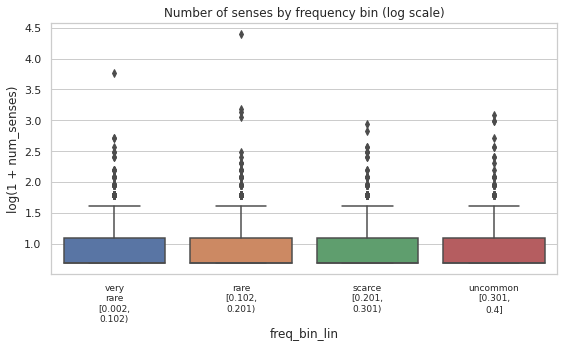

In [147]:
df = df.copy()
df['num_senses'] = df['num_senses'].replace([np.inf, -np.inf], np.nan)
df['num_senses_log'] = np.log1p(df['num_senses'])

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='freq_bin_lin', y='num_senses_log',
                 data=df, orient='v')
ax.set_title('Number of senses by frequency bin (log scale)')
ax.set_ylabel('log(1 + num_senses)')

cats = df['freq_bin_lin'].cat.categories.astype(str)
wrapped = [c.replace(' ', '\n') for c in cats]
ax.set_xticks(range(len(cats)))
ax.set_xticklabels(wrapped, rotation=0, ha='center')

ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()

Avoid hasty conclusions, a visual-only inspection is not enough. Let's challenge the hypothesis with a statistical analysis.

,freq_bin,count,mean,median,std
0,"(0.0016, 0.0418]",2184,0.833847,0.693147,0.268064
1,"(0.0418, 0.0816]",2158,0.877402,0.693147,0.290840
2,"(0.0816, 0.121]",1130,0.915453,0.693147,0.324742
3,"(0.121, 0.161]",939,0.926222,0.693147,0.333601
4,"(0.161, 0.201]",533,0.942038,0.693147,0.387422
5,"(0.201, 0.241]",627,0.942295,0.693147,0.347260
6,"(0.241, 0.281]",549,0.968155,0.693147,0.358830
7,"(0.281, 0.32]",465,0.995960,0.693147,0.378331
8,"(0.32, 0.36]",406,0.999119,1.098612,0.366274
9,"(0.36, 0.4]",360,1.015010,0.693147,0.405850


slope: 0.4947, SE: 0.0303, t: 16.31, p: 0.00e+00
R^2: 0.0277; Pearson r: 0.1664 (p=5.09e-59)
RANSAC slope: 0.0000


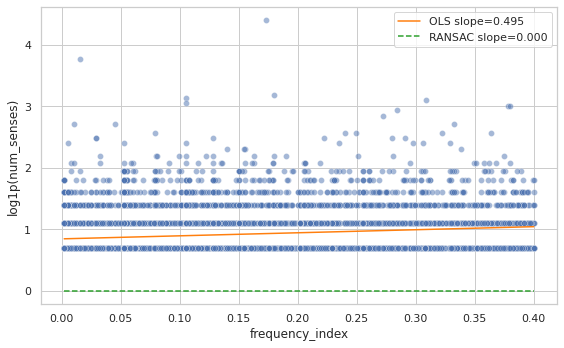

In [148]:
df2 = df.dropna(subset=['frequency_index', 'num_senses']).copy()
# df2 = df2[df2['num_senses'] >= 0]
df2['num_senses_log1p'] = np.log1p(df2['num_senses'])
# linear bins (or use quantile bins)
df2['freq_bin'] = pd.cut(df2['frequency_index'], bins=10)
summary = df2.groupby('freq_bin', observed=False)['num_senses_log1p'].agg(
    ['count', 'mean', 'median', 'std']).reset_index()
display(summary)
x = df2['frequency_index'].to_numpy()
y = df2['num_senses_log1p'].to_numpy()

# OLS = Ordinary Least Squares — the standard linear regression estimator that chooses intercept and slope to minimize the sum of squared residuals.
X = np.vstack([np.ones_like(x), x]).T
beta = np.linalg.lstsq(X, y, rcond=None)[0]   # intercept, slope
intercept, slope = beta
yhat = intercept + slope * x
resid = y - yhat
n = len(y)
p = 2
sse = np.sum(resid**2)
s2 = sse / (n - p)
cov = s2 * np.linalg.inv(X.T @ X)
se_slope = np.sqrt(cov[1, 1])
t_slope = slope / se_slope
p_slope = 2*(1 - t.cdf(abs(t_slope), df=n-p))
r2 = 1 - sse / np.sum((y - y.mean())**2)
r, p_r = pearsonr(x, y)

print(
    f"slope: {slope:.4f}, SE: {se_slope:.4f}, t: {t_slope:.2f}, p: {p_slope:.2e}")
print(f"R^2: {r2:.4f}; Pearson r: {r:.4f} (p={p_r:.2e})")

# Robust regression via RANSAC
mask = df2['num_senses'] > 0
X_r = df2.loc[mask, ['frequency_index']].to_numpy()
y_r = np.log(df2.loc[mask, 'num_senses'].to_numpy())

ransac = RANSACRegressor(LinearRegression()).fit(X_r, y_r)
inlier_mask = ransac.inlier_mask_
slope_ransac = ransac.estimator_.coef_[0]
intercept_ransac = ransac.estimator_.intercept_

print(f"RANSAC slope: {slope_ransac:.4f}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='frequency_index', y='num_senses_log1p', data=df2, alpha=0.5)
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, intercept + slope*xs, color='tab:orange',
         label=f"OLS slope={slope:.3f}")
plt.plot(xs, intercept_ransac + slope_ransac*xs, color='tab:green',
         linestyle='--', label=f"RANSAC slope={slope_ransac:.3f}")
plt.xlabel('frequency_index')
plt.ylabel('log1p(num_senses)')
plt.legend()
plt.tight_layout()
plt.show()

OLS results:

- **Slope** = 0.495. A one-unit increase in `frequency_index` is associated with ≈0.495 increase in `log1p(num_senses)`.
- **t** = 16.31, **p** ≈ 0 → statistically highly significant.
- **R²** = 0.0277 → `frequency_index` explains only ~2.8% of variance in `log1p(num_senses)`. Statistically significant but small practical effect for prediction.
- **Pearson r** = 0.166 (p ≈ 5e-59): small positive correlation, highly significant due to large `N`.

**RANSAC slope** = 0: robust outlier-resistant fit finds essentially no linear trend among inliers, suggesting the OLS slope may be driven by many small effects or by influential points at the distribution tails.

There is a positive association between frequency and polysemy (higher-frequency bins have higher mean log1p(num_senses)), OLS finds a clear positive slope with very small SE.
However, the effect size is small (R² ≈ 2.8%, Pearson r ≈ 0.17) and a **robust regression (RANSAC) yields no slope**, so **frequency alone is a weak and possibly fragile predictor of polysemy**.

#### <a id='toc1_3_6_5_'></a>[Per gender and frequency bins summary table](#toc0_)

In [149]:
summary = df.groupby(['gender', 'freq_bin_lin'], observed=False).agg(
    words=('word', 'count'),
    mean_freq=('frequency_index', 'mean'),
    median_freq=('frequency_index', 'median'),
    mean_len=('word_len', 'mean'),
    median_senses=('num_senses', 'median')
).reset_index()
summary

,gender,freq_bin_lin,words,mean_freq,median_freq,mean_len,median_senses
0,f,"very rare [0.002, 0.102)",1670,0.038869,0.053,9.656287,1.0
1,f,"rare [0.102, 0.201)",790,0.138718,0.132,9.483544,1.0
2,f,"scarce [0.201, 0.301)",507,0.244858,0.245,9.335306,1.0
3,f,"uncommon [0.301, 0.4]",396,0.346285,0.348,9.002525,1.0
4,m,"very rare [0.002, 0.102)",2727,0.039875,0.053,8.568390,1.0
5,m,"rare [0.102, 0.201)",1362,0.139351,0.138,8.513216,1.0
6,m,"scarce [0.201, 0.301)",799,0.243820,0.245,8.270338,1.0
7,m,"uncommon [0.301, 0.4]",567,0.345966,0.345,8.326279,1.0


#### <a id='toc1_3_6_6_'></a>[Hypernym detection](#toc0_)

A hypernym is a general or superordinate term that denotes a **broader category** encompassing more specific words (*hyponyms*); e.g., "vehicle" is a hypernym of "car", "bicycle", and "truck". Hypernyms help organize words into a hierarchy based on their meanings. It is in this case useful for downstream lexicon enrichment or semantic analysis.

<div style="display:flex;justify-content:center;padding:10px 0;" aria-label="TO DO: implement a better heuristic. A.F.">
  <div role="group" aria-label="IDEA: Basic and experimental implementation. To be further explored."
       style="display:flex;align-items:flex-start;gap:12px;background:linear-gradient(180deg,#fff8f0 0%,#fff3ea 100%);
              border:1px solid #e7cab3;color:#4b2e14;padding:12px 14px;border-radius:10px;
              box-shadow:0 10px 20px rgba(75,46,20,0.06);max-width:760px;width:96%;box-sizing:border-box;
              font-family:system-ui,-apple-system,'Segoe UI',Roboto,'Helvetica Neue',Arial;text-align:left;">
    <div style="width:36px;height:36px;display:flex;align-items:center;justify-content:center;
                color:#b85c1a;flex-shrink:0;font-size:20px;line-height:1;margin-top:2px;">🧚</div>
    <div style="display:block;min-width:0;">
      <div style="margin:0;font-weight:700;color:#7a3b10;font-size:16px;line-height:1.2;">Wait!</div>
      <div style="margin:6px 0 0 0;color:#3b2618;font-size:14px;line-height:1.25;">
        Basic and <strong style="color:#5a2e0d;font-weight:700;">experimental</strong> implementation.
      </div>
      <div style="margin:6px 0 0 0;color:#5b3b2a;font-style:italic;font-size:13px;">
        Marked for enhancement.
      </div>
    </div>
  </div>
</div>

Automatically mine the head noun (hypernym) from dictionary-style French definitions.

In [150]:
pattern_fr = re.compile(
    r"""\b(?:
            est|sont|désigne|désignent|signifie|signifient|
            correspond(?:ent)?\s+à|veut(?:ent)?\s+dire|
            appelé|appelée|appelés|appelées|se\s+dit|se\s+disent|:
        )\s+
        (?:un|une|le|la|les|l'|des|du|de\s+la)?\s*
        (?P<hyper>[A-Za-zÀ-ÖØ-öø-ÿ'’\-\s]+?)
        (?=,|\s+qui|\s+que|\s+dont|\s+où|\.|;|$)
    """,
    re.I | re.X,
)


def extract_hypernym(deftext):
    s = (deftext or '').split('|')[0]
    m = pattern_fr.search(s)
    return m.group('hyper').strip() if m else None


df['hypernym_guess'] = df['definitions'].fillna('').apply(extract_hypernym)
hypernym_df = df[df[['word', 'hypernym_guess']].notnull().all(axis=1)]
hypernym_df[['word', 'hypernym_guess']].head(10)

,word,hypernym_guess
12,aborigène,originaire du pays
15,aboulique,atteint d'aboulie
21,abrupt,escarpée et comme rompue
25,absentéiste,souvent absent alors qu'il devrait être présent
38,acception,utilisé
42,accompli,parfait en son genre
59,achondroplasie,forme la plus fréquente de nanisme à court-membre
65,acouphène,seulement un effet du battement des artères ou...
75,actionneur,fournie en un travail utile à l'exécution de t...
82,addendum,basé


Enhancements could involve utilizing spaCy’s tokenization, POS tagging, noun-chunking, and dependency information, specifically targeting the first noun following markers such as "être,", "nom," while also applying heuristics for colon-style definitions (X:..), copular constructions ("X est Y,"), and appositive markers (X,..).

## <a id='toc1_4_'></a>[Section 3 — Lexical / form-level analyses](#toc0_)

This section deals with examination of word structure, patterns, and complexity.The purpose is to enhance the quality of the language analysis by exploring linguistic features such as affixes, n-grams, neighborhood density, and orthographic complexity.

### <a id='toc1_4_1_'></a>[1) Affix studies](#toc0_)

 Capture morphological tendencies (prefixes and suffixes).

In [151]:
def affix_counts(words, side='suffix', min_len=1, max_len=4):
    cnt = Counter()
    for w in words:
        for l in range(min_len, min(max_len+1, len(w)+1)):
            aff = w[-l:] if side == 'suffix' else w[:l]
            cnt[aff] += 1
    return pd.DataFrame(cnt.most_common(), columns=[f'{side}', 'count'])


words = df['word'].astype(str).tolist()
suffix_df = affix_counts(words, 'suffix')
prefix_df = affix_counts(words, 'prefix')
display(suffix_df.head(10), prefix_df.head(10))

,suffix,count
0,e,4639
1,n,1093
2,r,865
3,on,678
4,te,669
5,t,662
6,ie,639
7,re,520
8,ur,457
9,eur,448


,prefix,count
0,c,1140
1,p,941
2,s,791
3,a,738
4,m,617
5,b,565
6,t,547
7,d,508
8,r,465
9,g,389


### <a id='toc1_4_2_'></a>[2) N-Grams analysis](#toc0_)

#### <a id='toc1_4_2_1_'></a>[N-grams global summary](#toc0_)

An **n-gram** is a contiguous **sequence of n words** (or tokens) from a piece of text, its purpose is to capture local word patterns. 
- Within each definition, let's capture the most frequent n-grams:

In [152]:
_WORD_RE = re.compile(r"\w+", re.UNICODE)


def tokenize(text):
    if pd.isna(text):
        return []
    s = str(text).lower().replace("|", " ")
    return _WORD_RE.findall(s)


def ngrams_from_tokens(tokens, n):
    L = len(tokens)
    if L < n:
        return []
    return [" ".join(tokens[i:i+n]) for i in range(L - n + 1)]


def extract_ngrams_series(def_series, n):
    # Returns list-of-lists (one list of ngrams per row)
    return def_series.map(lambda t: ngrams_from_tokens(tokenize(t), n))


def build_summary(df, min_n=2, max_n=4, sample_examples=2, word_col='word', def_col='definitions'):
    # Pre-tokenize once and store token counts
    tokens_series = df[def_col].map(tokenize)
    df = df.copy()
    df['definition_tokens_count'] = tokens_series.map(len)

    # Extract ngram lists for each n and store as columns
    ngram_cols = {}
    for n in range(min_n, max_n + 1):
        col = f'{n}gram_list'
        df[col] = tokens_series.map(
            lambda toks, n=n: ngrams_from_tokens(toks, n))
        ngram_cols[n] = col

    global_counts = {n: Counter() for n in range(min_n, max_n + 1)}
    ngram_entry_sets = {n: defaultdict(set) for n in range(min_n, max_n + 1)}
    per_entry_counts = {}

    # Iterate rows but only over the already extracted ngram lists (faster than tokenizing inside loop)
    for idx, row in df[[word_col] + list(ngram_cols.values())].iterrows():
        word_id = row.get(word_col, idx)
        for n, col in ngram_cols.items():
            ngrams = row[col] or []
            per_entry_counts.setdefault(n, []).append(len(ngrams))
            global_counts[n].update(ngrams)
            for ng in set(ngrams):
                ngram_entry_sets[n][ng].add(word_id)

    summary = {'total_entries': len(df), 'ngram_sizes': {}}
    for n in range(min_n, max_n + 1):
        total_ngrams = sum(global_counts[n].values())
        unique_ngrams = len(global_counts[n])
        top10 = global_counts[n].most_common(10)

        rows = []
        for ng, cnt in top10:
            rows.append({
                'ngram': ng,
                'count': cnt,
                'distinct_word_entries_count': len(ngram_entry_sets[n][ng]),
                'relative_frequency': cnt / total_ngrams if total_ngrams else 0.0,
                'sample_entries': ", ".join(list(ngram_entry_sets[n][ng])[:sample_examples])
            })
        top10_df = pd.DataFrame(rows, columns=[
                                'ngram', 'count', 'distinct_word_entries_count', 'relative_frequency', 'sample_entries'])

        stats = {
            'total_ngrams_count': total_ngrams,
            'total_unique_ngrams': unique_ngrams,
            'avg_ngrams_per_entry': mean(per_entry_counts.get(n, [])) if per_entry_counts.get(n) else 0.0,
            'median_ngrams_per_entry': median(per_entry_counts.get(n, [])) if per_entry_counts.get(n) else 0.0,
            'top_10_df': top10_df
        }
        summary['ngram_sizes'][str(n)] = stats

    return df, summary


# Usage
df_with_ngrams, summary = build_summary(df)

# Display summary tables:
print(f"Total entries: {summary['total_entries']}\n")
for n, info in summary['ngram_sizes'].items():
    print(f"=== {n}-grams ===")
    print(
        f"Total ngrams: {info['total_ngrams_count']}, Unique: {info['total_unique_ngrams']}")
    print(
        f"Avg per entry: {info['avg_ngrams_per_entry']:.2f}, Median per entry: {info['median_ngrams_per_entry']:.2f}")
    display(info['top_10_df'])
    print()

Total entries: 9351

=== 2-grams ===
Total ngrams: 170671, Unique: 85877
Avg per entry: 18.25, Median per entry: 13.00


,ngram,count,distinct_word_entries_count,relative_frequency,sample_entries
0,de la,2001,1562,0.011724,"préhistorien, cynégétique"
1,d un,1491,1186,0.008736,"oxychlorure, courtaude"
2,de l,1349,1100,0.007904,"franc-jeu, pérou"
3,d une,1082,888,0.006340,"dérogation, marsupial"
4,dans le,942,511,0.005519,"magenta, apiculture"
5,à la,725,645,0.004248,"huronne, birmane"
6,située dans,659,248,0.003861,"magenta, clam"
7,le département,658,251,0.003855,"magenta, clam"
8,commune française,642,236,0.003762,"magenta, clam"
9,française située,641,236,0.003756,"magenta, clam"



=== 3-grams ===
Total ngrams: 161457, Unique: 126928
Avg per entry: 17.27, Median per entry: 12.00


,ngram,count,distinct_word_entries_count,relative_frequency,sample_entries
0,dans le département,657,250,0.004069,"magenta, clam"
1,située dans le,644,237,0.003989,"magenta, clam"
2,commune française située,641,236,0.003970,"magenta, clam"
3,française située dans,640,236,0.003964,"magenta, clam"
4,le département de,397,161,0.002459,"magenta, clam"
5,la famille des,237,230,0.001468,"tangara, halogénure"
6,de la famille,229,224,0.001418,"tangara, halogénure"
7,département de la,221,106,0.001369,"magenta, clam"
8,le département du,184,93,0.001140,"clermontois, brestoise"
9,département de l,183,83,0.001133,"minerve, clermontois"



=== 4-grams ===
Total ngrams: 152496, Unique: 135711
Avg per entry: 16.31, Median per entry: 11.00


,ngram,count,distinct_word_entries_count,relative_frequency,sample_entries
0,située dans le département,642,236,0.004210,"magenta, clam"
1,commune française située dans,640,236,0.004197,"magenta, clam"
2,française située dans le,640,236,0.004197,"magenta, clam"
3,dans le département de,396,160,0.002597,"magenta, clam"
4,de la famille des,222,217,0.001456,"tangara, halogénure"
5,le département de la,216,104,0.001416,"magenta, clam"
6,dans le département du,184,93,0.001207,"clermontois, brestoise"
7,le département de l,180,81,0.001180,"minerve, clermontois"
8,dans le département des,77,38,0.000505,"colombienne, niçoise"
9,dont on se sert,56,56,0.000367,"bourriche, gabion"


#### <a id='toc1_4_2_2_'></a>[Character N-grams in word entries](#toc0_)
Most frequent **character n-grams** (2-5). Character n-grams are contiguous sequences of **n characters** from a given text.

*Components:* the items are **individual characters**, allowing for a more granular analysis.

In [153]:
# Allow letters, digits, hyphen | could allow more global unicode too
_valid_re = re.compile(r"^[A-Za-zÀ-ÖØ-öø-ÿ0-9\-]+$")


def char_ngrams(words, nmin=2, nmax=5, topk=100, valid_re=_valid_re):
    cnt = Counter()
    for w in words:
        if not isinstance(w, str):
            continue
        for n in range(nmin, nmax+1):
            for i in range(len(w)-n+1):
                ng = w[i:i+n]
                if valid_re.match(ng):
                    cnt[ng] += 1
    return pd.DataFrame(cnt.most_common(topk), columns=['ngram', 'count'])


char_ngrams_df = char_ngrams(words, 2, 5, 200)
char_ngrams_df.head(10)

,ngram,count
0,on,1480
1,te,1253
2,is,1145
3,ti,1107
4,ie,1098
5,an,1082
6,ri,994
7,in,994
8,re,981
9,ra,956


### <a id='toc1_4_3_'></a>[3) Orthographic complexity](#toc0_)

#### <a id='toc1_4_3_1_'></a>[Neighbourhood density](#toc0_)

For each word, count how many other words in the list differ from it by exactly one single edit operation (edit distance = 1; insertion, deletion, or substitution of a single character).

In [154]:
word_list = list(set([w for w in words if w]))
nbr_counts = {}
for w in word_list:
    cnt = sum(1 for other in word_list if other !=
              w and Levenshtein.distance(w, other) == 1)
    nbr_counts[w] = cnt
df['orth_neigh_density'] = df['word'].map(nbr_counts).fillna(0).astype(int)
df[['word', 'orth_neigh_density']].sort_values(
    'orth_neigh_density', ascending=False).head(15)

,word,orth_neigh_density
6264,palus,5
5984,noue,5
1115,bore,5
4865,kari,5
5704,more,5
6432,penon,5
7287,raja,5
4080,gore,5
2770,dine,4
6497,péan,4


A higher value means the word sits in a denser local neighborhood of similar spellings (and is likely more easily confused or morphologically/phonologically related).

#### <a id='toc1_4_3_2_'></a>[Orthographic complexity score](#toc0_)

Uncommon letters and consonant cluster ratio.

In [155]:
# Top N single-character letters from sense_char_df
N = 20
# Ensure index is strings and single-character, then take top N by 'count'
idx = sense_char_df.index.astype(str)
single = idx[idx.str.len() == 1]
top_letters = set(single[:N].str.lower().tolist())

vowels = set("aeiouàâäéèêëïîôöùûüÿyAEIOUÀÂÄÉÈÊËÏÎÔÖÙÛÜŸY")


def complexity(w):
    if not w:
        return 0.0
    w_lower = w.lower()
    # Count letters not in top_letters
    uncommon_letters = sum(
        1 for ch in w_lower if ch.isalpha() and ch not in top_letters)
    # Include non-letter characters as uncommon (optional)
    # non_letters = sum(1 for ch in w_lower if not ch.isalpha())
    # uncommon = uncommon_letters + non_letters

    consonants = sum(1 for ch in w_lower if ch.isalpha() and ch not in vowels)
    clusters = len(re.findall(r'(?i)[bcdfghjklmnpqrstvwxyz]{2,}', w))
    return (uncommon_letters / max(1, len(w))) + (clusters / max(1, consonants))

In [156]:
df['orth_complexity'] = df['word'].apply(complexity)
df[['word', 'orth_complexity']].sort_values(
    'orth_complexity', ascending=False).head(10)

,word,orth_complexity
1191,bouzy,1.100000
6727,playboy,1.095238
9339,zloty,1.066667
8691,thaï,1.000000
6169,oryx,1.000000
4469,hyoïde,1.000000
2936,dyke,1.000000
4245,hakka,0.933333
9280,wallaby,0.928571
1096,bombyx,0.916667


The score sums the fraction of characters that are outside the allowed alphabet and the ratio of consonant clusters (2+ letters) to total consonants, with safeguards to avoid division by zero.

### <a id='toc1_4_4_'></a>[4) Hyphenation / compound detection](#toc0_)

Detect hyphenated words and long words as potential compounds; split heuristically

In [157]:
def is_letter(ch):
    return ch.isalpha()


def split_candidates(w):
    if not isinstance(w, str) or w == '':
        return []
    # Hyphen split
    if '-' in w:
        return [p for p in w.split('-') if p]
    # camelCase / PascalCase split (no regex): find transitions from lower->upper
    parts = []
    start = 0
    for i in range(1, len(w)):
        if w[i].isupper() and w[i-1].islower():
            parts.append(w[start:i])
            start = i
    if start > 0:
        parts.append(w[start:])
        if len(parts) > 1:
            return parts
    # Vowel-consonant boundary near middle (scan left from mid)
    n = len(w)
    mid = n // 2
    for i in range(mid, 1, -1):
        a, b = w[i-1], w[i]
        if is_letter(a) and is_letter(b):
            if (a not in vowels) and (b in vowels):
                return [w[:i], w[i:]]
    # Fallback: split on non-alphanumeric characters without regex
    parts = []
    cur = []
    for ch in w:
        if ch.isalnum():
            cur.append(ch)
        else:
            if cur:
                parts.append(''.join(cur))
                cur = []
    if cur:
        parts.append(''.join(cur))
    if parts and len(parts) > 1:
        return parts
    # Default: return whole word
    return [w]


df['is_hyphenated'] = df['word'].str.contains('-', na=False)
df['is_long'] = df['word'].str.len().fillna(0) >= 12
df['compound_parts'] = df['word'].apply(split_candidates)
df.loc[df['is_hyphenated'] | df['is_long'],
       ['word', 'compound_parts']].head(10)

,word,compound_parts
2,abaisse-langue,"[abaisse, langue]"
5,abat-son,"[abat, son]"
11,abolitionniste,"[abolit, ionniste]"
35,accastillage,"[accast, illage]"
37,accentuation,"[accent, uation]"
40,accessoiriste,"[access, oiriste]"
41,acclimatement,"[acclim, atement]"
46,accroupissement,"[accroup, issement]"
49,acculturation,"[accult, uration]"
50,accumulateur,"[accum, ulateur]"


Well, there is definately some room for improvement here! 👽

<div style="display:flex;justify-content:center;padding:10px 0;">
  <div style="background:#fff8f0;border:1px solid #e7cab3;color:#4b2e14;padding:10px 12px;border-radius:10px;
              box-shadow:0 8px 16px rgba(75,46,20,0.06);font-family:system-ui, -apple-system, 'Segoe UI', Roboto, Arial;
              display:flex;gap:12px;align-items:flex-start;">
    <div style="width:36px;height:36px;display:flex;align-items:center;justify-content:center;color:#b85c1a;font-weight:700;font-size:20px;">
      ❗
    </div>
    <div style="display:block;">
      <div style="margin:0;font-weight:700;color:#7a3b10;font-size:15px;line-height:1;">TO DO</div>
      <div style="margin:0;color:#3b2618;font-size:13.5px;line-height:1.2;">Implement a better <strong style="color:#5a2e0d;">heuristic.</strong></div>
      <div style="margin:0;color:#5b3b2a;font-style:italic;font-size:12.5px;">Marked for enhancement.</div>
    </div>
  </div>
</div>


### <a id='toc1_4_5_'></a>[5) Regular vs irregular forms](#toc0_)

Heuristic: compare `word` vs `base_form` endings; flag where many derived forms deviate.

In [158]:
def irregular_flag(row):
    w = row['word']
    b = row['base_form']
    if not b or b == w:
        return False
    # If base_form is prefix of word with simple suffix (1-4 chars), treat as regular
    for l in range(1, 5):
        if w.startswith(b) and len(w)-len(b) == l:
            return False
    if w.endswith(b) and len(b)-len(w) == l:  # unlikely but keep
        return False
    # More heuristics: edit distance >2 or vowel changes
    if Levenshtein.distance(w, b) > 2:
        return True
    return False


df['likely_irregular'] = df.apply(irregular_flag, axis=1)
df[df['likely_irregular'] == True][[
    'word', 'base_form', 'likely_irregular']].head(10)

,word,base_form,likely_irregular
1059,blasphématrice,blasphémateur,True
2045,conciliatrice,conciliateur,True
2088,consolatrice,consolateur,True
2171,coordinatrice,coordinateur,True
2228,corruptrice,corrupteur,True
2536,devineresse,devineur,True
2842,dominatrice,dominateur,True
3186,excavatrice,excavateur,True
3576,fédératrice,fédérateur,True
3704,formatrice,formateur,True


### <a id='toc1_4_6_'></a>[6) Phonotactic summarization](#toc0_)

- vowel/consonant patterns
- approximate syllable counts
- stress heuristic estimate

In [159]:
def vowel_pattern(w): return ''.join(
    ['V' if ch.lower() in vowels else ('C' if ch.isalpha() else ch) for ch in w])


df['vc_pattern'] = df['word'].apply(vowel_pattern)
df['approx_syllables'] = df['word'].apply(lambda w: max(
    1, len(re.findall(r'[aeiouyàâäéèêëïîôöùûüÿœæ]', w.lower()))))

# Stress estimate heuristic: last vowel position relative to end (useful for French rules)
def stress_pos(w):
    matches = [m.start() for m in re.finditer(
        r'[aeiouyàâäéèêëïîôöùûüÿœæ]', w.lower())]
    if not matches:
        return None
    last = matches[-1]
    if last >= len(w)-2:
        return 'final'
    if last >= len(w)-4:
        return 'penult'
    return 'anté-penult'


df['syllables'] = df['approx_syllables']
df['stress_estimate'] = df['word'].apply(stress_pos)
df[['word', 'vc_pattern', 'syllables', 'stress_estimate']].head(15)

,word,vc_pattern,syllables,stress_estimate
0,abaca,VCVCV,3,final
1,abaisse,VCVVCCV,4,final
2,abaisse-langue,VCVVCCV-CVCCVV,7,final
3,abalone,VCVCVCV,4,final
4,abaque,VCVCVV,4,final
5,abat-son,VCVC-CVC,3,final
6,abbatiale,VCCVCVVCV,5,final
7,aber,VCVC,2,final
8,abécédaire,VCVCVCVVCV,6,final
9,ablatif,VCCVCVC,3,final


## <a id='toc1_5_'></a>[Section 4 — Semantic analyses](#toc0_)

This section provides some approaches to analyze meaning, association and check data integrity in lexical resources.

In [160]:
nlp = spacy.load("fr_core_news_sm")

### <a id='toc1_5_1_'></a>[1) Common differentia terms](#toc0_)

A common differentia candidate is a word or short phrase in a definition that specifies how the defined term differs from its hypernym.

- Let's search for the part of a definition that tells what makes the defined thing distinct from the broader class it belongs to:

*"A sparrow is a small songbird"*, the hypernym is *"songbird"* (the broader class) and the differentia is *"small"* — the information that narrows or distinguishes sparrow from other songbirds.

🐦

To achieve this, an approach is to use spaCy for lemmatization, remove stop words and non-alphabetic tokens, then use scikit-learn's CountVectorizer to create a term frequency matrix, ultimately generating a DataFrame that shows the most frequently occurring differentia terms in the definitions.

In [161]:
#french_stop = list(nlp.Defaults.stop_words)  # a set

# Simple preprocessing using spaCy (lemmatize, remove punctuation/numbers)
def preprocess_fr(text):
    if not text:
        return ""
    doc = nlp(text)
    tokens = [tok.lemma_.lower()
              for tok in doc if tok.is_alpha and not tok.is_stop]
    return " ".join(tokens)


# Explicit lemmatization step without creating Doc column:
df['definitions_proc'] = [
    " ".join([t.lemma_.lower() for t in doc if t.is_alpha and not t.is_stop])
    for doc in df['definitions'].fillna("").map(lambda txt: nlp(txt))
]

vec = CountVectorizer(ngram_range=(1, 1))
X = vec.fit_transform(df['definitions_proc'])

# Build term-frequency DataFrame
freqs = np.asarray(X.sum(axis=0)).ravel()
diff_terms = pd.DataFrame({'term': vec.get_feature_names_out(
), 'count': freqs}).sort_values('count', ascending=False)
diff_terms.head(5)

,term,count
6215,français,739
13453,situer,729
12331,relatif,702
4901,département,687
3237,commun,664


Most common differentia terms are spatially related.

### <a id='toc1_5_2_'></a>[2) Semantic field analysis](#toc0_)

#### <a id='toc1_5_2_1_'></a>[Semantic field clustering with embeddings](#toc0_)

Generate embeddings for text definitions, and then performs K-means clustering to group similar definitions together, with the goal of automatically categorizing or organizing text data based on semantic similarity.

In [162]:
# Debugging environment variables
# os.environ["HF_DEBUG"] = "1"
os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
os.environ["HF_HUB_DOWNLOAD_TIMEOUT"] = "300"

# Load the SentenceTransformer model from Hugging Face
model_name = 'sentence-transformers/all-MiniLM-L6-v2'  # Use Hugging Face model name
try:
    model = SentenceTransformer(model_name)
except Exception as e:
    print(f"Error loading the model: {e}")
    raise

print("CUDA Available:", torch.cuda.is_available())

defs = df['definitions'].replace('', np.nan).dropna()
print('Loaded definitions')

# Encode definitions
embeddings = model.encode(defs.tolist(), show_progress_bar=True)

# Heuristic cluster count
k = min(20, max(2, int(len(defs) / 200)))
print('Cluster count (k):', k)

# KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
cluster_map = dict(zip(defs.index, kmeans.labels_))

# Assign clusters to the DataFrame
df['def_cluster'] = df.index.map(cluster_map)

# Group by clusters and display size
print(df.groupby('def_cluster').size().sort_values(ascending=False).head(10))

CUDA Available: True
Loaded definitions


Batches:   0%|          | 0/293 [00:00<?, ?it/s]

Cluster count (k): 20
def_cluster
14    1330
19     761
6      737
1      597
5      584
8      543
16     522
9      490
18     413
3      409
dtype: int64


#### <a id='toc1_5_2_2_'></a>[Gender and semantic associations](#toc0_)

Group rows by cluster and gender to count occurrences and compute each cluster's total and male ratio.

In [163]:
df['gender_for_analysis'] = df['gender'].astype(object).fillna('unknown')

cluster_gender = df.groupby(['def_cluster','gender_for_analysis']).size().unstack(fill_value=0)
cluster_gender['total'] = cluster_gender.sum(axis=1)
cluster_gender['male_ratio'] = cluster_gender.get('m', 0) / cluster_gender['total']
cluster_gender.sort_values('total', ascending=False).head(20)

gender_for_analysis,f,m,unknown,total,male_ratio
def_cluster,,,,,
14,471,799,60,1330,0.600752
19,260,492,9,761,0.646518
6,260,428,49,737,0.580733
1,240,346,11,597,0.579564
5,210,356,18,584,0.609589
8,327,183,33,543,0.337017
16,234,256,32,522,0.490421
9,180,254,56,490,0.518367
18,110,276,27,413,0.668281


Cluster 8 and 4 provide the strongest gender-divide. It is interesting to have a look at what they relate to.

In [164]:
display(df[df['def_cluster'] == 4]['word'].sample(5, random_state=42))
display(df[df['def_cluster'] == 8]['word'].sample(5, random_state=42))

5120    lithotriteur
890           bayard
8482       tablature
5668         monodie
492           araire
Name: word, dtype: object

9057             urologie
8300             stimulus
6204            ovulation
9058             urologue
5864    neurotransmetteur
Name: word, dtype: object

### <a id='toc1_5_3_'></a>[3) Definition analysis](#toc0_)

#### <a id='toc1_5_3_1_'></a>[Definition length & specificity metrics](#toc0_)

Summary statistics of per-definition character length, token count, and lexical diversity using spaCy tokenization (alphabetic tokens only).

In [165]:
def spacy_tokens(text):
    if not text:
        return []
    doc = nlp(text)
    # keep alphabetic/word tokens (no punctuation, no space)
    return [token.text.lower() for token in doc if token.is_alpha]


def lexical_diversity_spacy(text):
    toks = spacy_tokens(text)
    return len(set(toks)) / max(1, len(toks))


# Compute columns
df['def_char_len'] = df['definitions'].str.len().fillna(0).astype(int)
df['def_token_len'] = df['definitions'].apply(lambda x: len(spacy_tokens(x)))
df['def_lexical_diversity'] = df['definitions'].apply(lexical_diversity_spacy)

# Quick stats
display(df[['word', 'def_char_len', 'def_token_len',
        'def_lexical_diversity']].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
def_char_len,9351.0,118.484975,141.395484,4.0,49.000000,88.000000,148.0,7777.0
def_token_len,9351.0,17.807507,19.109024,0.0,7.000000,13.000000,22.0,820.0
def_lexical_diversity,9351.0,0.903036,0.114589,0.0,0.842105,0.928571,1.0,1.0


#### <a id='toc1_5_3_2_'></a>[Collocation extraction in definitions](#toc0_)

Extract frequent 2-word collocations (adj+noun, noun+noun) via POS patterns.

In [166]:
colls = Counter()

for text in df['definitions'].fillna(''):

    doc = nlp(text.lower())
    tokens_tags = [(tok.text, tok.pos_) for tok in doc]

    # iterate adjacent pairs
    for (w1, t1), (w2, t2) in zip(tokens_tags, tokens_tags[1:]):
        # normalize POS labels between spaCy and NLTK:
        # spaCy: 'ADJ','NOUN','PROPN'; NLTK: 'JJ','NN', etc.
        t1_norm = t1 if isinstance(t1, str) else str(t1)
        t2_norm = t2 if isinstance(t2, str) else str(t2)

        is_adj = (t1_norm.startswith('J') or t1_norm.upper() == 'ADJ')
        is_n1 = (t2_norm.startswith('N')
                 or t2_norm.upper() in {'NOUN', 'PROPN'})
        is_n0 = (t1_norm.startswith('N')
                 or t1_norm.upper() in {'NOUN', 'PROPN'})

        # adjective + noun OR noun + noun
        if (is_adj and is_n1) or (is_n0 and is_n1):
            colls[f"{w1} {w2}"] += 1

# build DataFrame of top bigrams
bigram_df = pd.DataFrame(colls.most_common(50), columns=['bigram', 'count'])
bigram_df.head(10)

,bigram,count
0,autre orthographe,26
1,autre nom,23
2,quinzième jour,20
3,alpes -,18
4,chef -,18
5,- lieu,18
6,grand nombre,17
7,petite taille,16
8,- christ,15
9,pays -,14


### <a id='toc1_5_4_'></a>[4) Data integrity and outlier detection](#toc0_)

#### <a id='toc1_5_4_1_'></a>[Outlier detection](#toc0_)

Basic outlier detection by multi-feature distance.
Detect outliers via z-score.

In [167]:
features = ['orth_neigh_density', 'orth_complexity', 'orth_neigh_density',
            'def_char_len', 'def_token_len', 'num_senses', 'frequency_index']
feat_df = df[features].fillna(0).astype(float)

# Normalize
z = (feat_df - feat_df.mean())/feat_df.std().replace(0, 1)
z['outlier_score'] = np.linalg.norm(z.values, axis=1)
df['outlier_score'] = z['outlier_score']
df[['word', 'outlier_score']].sort_values(
    'outlier_score', ascending=False).head(10)

,word,outlier_score
8292,stéphanois,85.373871
2847,donner,32.558039
6129,oratorien,22.260116
212,aixois,21.242668
1899,clermontois,19.982088
9191,victoria,19.497595
963,bénédictine,18.260731
962,bénédictin,18.257817
1978,colombin,16.790192
8944,triton,15.233311


#### <a id='toc1_5_4_2_'></a>[Provenance scoring](#toc0_)
Calculate a simple quality score per row by awarding points for having complete initial features (phonological transcription, base form, binary gender and a frequency index), while subtracting 0.5 for unusual characters in the word.

In [168]:
def provenance_score(row):
    score = 0
    if row['phonological_transcription']:
        score += 1
    if row['base_form'] and row['base_form'] != '':
        score += 1
    if row['gender'] in ['m', 'f']:
        score += 1
    if pd.notna(row['frequency_index']):
        score += 1
    # penalize uncommon chars
    if re.search(r"[^ \wàâäéèêëîïôöùûüÿœæç-]", row['word'], flags=re.I):
        score -= 0.5
    return score


df['provenance_score'] = df.apply(provenance_score, axis=1)
df[['word', 'provenance_score']].sort_values('provenance_score').head(10)

,word,provenance_score
3311,égocentriste,3.0
4196,guatémaltèque,3.0
3364,énarque,3.0
3367,énième,3.0
3370,énurétique,3.0
3383,épéiste,3.0
3343,élégiaque,3.0
3299,éditorialiste,3.0
3309,égocentrique,3.0
4253,haltérophile,3.0


#### <a id='toc1_5_4_3_'></a>[Top-k lists](#toc0_)

Top-lists examples.

In [169]:
top_poly = df.sort_values('num_senses', ascending=False).head(100)

inflections = df.groupby('base_form').size().sort_values(ascending=False)
inflections = df.groupby('base_form').size().reset_index(
    name='inflection_count').sort_values('inflection_count', ascending=False)
top_inflected = inflections.head(100)
top_hypernyms = df['hypernym_guess'].value_counts().head(50)

display(top_poly[['word', 'num_senses']].head(
    5), top_inflected.head(5), top_hypernyms.head(5))

,word,num_senses
8292,stéphanois,80
2847,donner,42
6129,oratorien,23
212,aixois,22
9191,victoria,21


,base_form,inflection_count
8600,valencien,2
4870,mal-baisé,2
4869,mal-aimé,2
5577,néerlandais,2
8593,vadrouilleur,2


hypernym_guess
usité               5
familier            3
nommé ci-dessus     3
particulièrement    3
fort mauvaise       2
Name: count, dtype: int64

## <a id='toc1_6_'></a>[Section 5 — Visualization & interactive tools](#toc0_)

### <a id='toc1_6_1_'></a>[1) Sankey diagram](#toc0_)

Sankey diagrams are useful to display quantitative relationships. Here, we'll focus on:
- base_form → gender → freq_bin

In [ ]:
RANDOM = True

# Frequency bins
df['freq_bin'] = pd.qcut(df['frequency_index'].fillna(
    df['frequency_index'].min() - 1), q=5, duplicates='drop').astype(str)

sankey_df = df[['base_form', 'gender', 'freq_bin']].astype(
    object).fillna('UNKNOWN')

if RANDOM:
    # Random (stable seed)
    top_bases = sankey_df['base_form'].value_counts().sample(75, random_state=42).index
else:
    # Keep top N base_forms to limit complexity
    top_bases = sankey_df['base_form'].value_counts().head(75).index

sankey_df = sankey_df[sankey_df['base_form'].isin(top_bases)]
# Unique nodes
nodes = np.unique(np.array(
    sankey_df['base_form'].tolist() + sankey_df['gender'].tolist() +
    sankey_df['freq_bin'].tolist()
)).tolist()
node_idx = {n: i for i, n in enumerate(nodes)}

links = []

# base_form -> gender
grp1 = sankey_df.groupby(['base_form', 'gender']
                         ).size().reset_index(name='value')
for _, r in grp1.iterrows():
    links.append({'source': node_idx[r['base_form']],
                 'target': node_idx[r['gender']], 'value': int(r['value'])})

# gender -> freq_bin
grp2 = sankey_df.groupby(['gender', 'freq_bin']
                         ).size().reset_index(name='value')
for _, r in grp2.iterrows():
    links.append({'source': node_idx[r['gender']],
                 'target': node_idx[r['freq_bin']], 'value': int(r['value'])})

fig = go.Figure(data=[go.Sankey(
    node=dict(label=nodes, pad=15, thickness=20),
    link=dict(
        source=[l['source'] for l in links],
        target=[l['target'] for l in links],
        value=[l['value'] for l in links]
    )
)])

fig.update_layout(
    title_text="Sankey: base_form → gender → freq_bin (Top 75 bases)", font_size=10, width=500, height=350)
fig.show()

### <a id='toc1_6_2_'></a>[2) UMAP](#toc0_)

UMAP is a fast dimensionality‑reduction algorithm that projects high‑dimensional data into low dimensions while preserving local and global structure. This is a UMAP projection of definition embeddings colored by gender/freq_bin/polysemy.

In [ ]:
proj = umap.UMAP(n_components=2, random_state=None).fit_transform(embeddings)
proj_df = pd.DataFrame(proj, index=defs.index, columns=['umap1', 'umap2'])
proj_df = proj_df.join(df[['gender', 'freq_bin', 'num_senses']])

# Plot examples colored by gender
fig2 = px.scatter(proj_df.reset_index(), x='umap1', y='umap2', color='gender', hover_data=['index', 'num_senses'])
fig2.update_layout(title='UMAP of definition embeddings colored by gender', width=500, height=350)
fig2.show()

### <a id='toc1_6_3_'></a>[3) Interactive dashboard](#toc0_)

Minimal Dash app to filter by suffix, frequency and inspect examples.

n.b. run this cell in your local Jupyter environment.

<div style="display:flex;justify-content:center;padding:10px 0;">
  <div role="group" aria-label="Pierre Loti: Suprêmes Visions d'Orient | Portrait of Pierre Loti by Henri Rousseau, 1891. "
       style="display:flex;align-items:flex-start;gap:12px;background:linear-gradient(180deg,#fff8f0 0%,#fff3ea 100%);
              border:1px solid #e7cab3;color:#4b2e14;padding:12px 14px;border-radius:10px;
              box-shadow:0 10px 20px rgba(75,46,20,0.06);max-width:760px;width:96%;box-sizing:border-box;
              font-family:system-ui,-apple-system,'Segoe UI',Roboto,'Helvetica Neue',Arial;text-align:left;">
    <div style="width:36px;height:36px;display:flex;align-items:center;justify-content:center;
                color:#b85c1a;flex-shrink:0;font-size:20px;line-height:1;margin-top:2px;">❗</div>
    <div style="display:block;min-width:0;">
      <div style="margin:0;font-weight:700;color:#7a3b10;font-size:16px;line-height:1.2;">Warning!</div>
      <div style="margin:6px 0 0 0;color:#3b2618;font-size:14px;line-height:1.25;">
        This cell <strong style="color:#5a2e0d;font-weight:700;">will not display properly </strong>on Kaggle.
      </div>
      <div style="margin:6px 0 0 0;color:#5b3b2a;font-style:italic;font-size:13px;">
        Try it in your local jupyter environment.
      </div>
    </div>
  </div>
</div>

In [ ]:
# Initialize the Dash app
app = Dash(__name__)

# Dropdown options
suffix_options = [{'label': s, 'value': s} for s in suffix_df['suffix']]

# Layout
app.layout = html.Div([
    dcc.Dropdown(id='suffix', options=suffix_options,
                 multi=False, placeholder='Select suffix'),
    html.Div(id='stats', style={'textAlign': 'left'}),
    dash_table.DataTable(
        id='table',
        columns=[{"name": c, "id": c} for c in [
            'word', 'base_form', 'gender', 'frequency_index', 'definitions']],
        page_size=10,
        style_cell={'textAlign': 'left'},
        style_header={'textAlign': 'left'}
    )
])


@app.callback(Output('table', 'data'), Output('stats', 'children'), Input('suffix', 'value'))
def update(suffix):
    d = df
    if suffix:
        d = d[d['word'].str.endswith(suffix)]
        stats = f"Rows: {len(d)}"
    else:
        stats = "No suffix selected."

    return d.head(500)[['word', 'base_form', 'gender', 'frequency_index', 'definitions']].to_dict('records'), stats


# Run the app inline in Jupyter notebook
if __name__ == '__main__':
    import threading

    def run_server():
        app.run(mode='jupyterlab', port=8050, use_reloader=False)

    thread = threading.Thread(target=run_server)
    thread.daemon = True
    thread.start()

    import time
    time.sleep(1)  # wait for the server to start

## <a id='toc1_7_'></a>[Section 6 — Review helpers and dataset export](#toc0_)

### <a id='toc1_7_1_'></a>[1) Quick QA checks recap](#toc0_)
This is a **recap** of common QA patterns checked in the first section: empty word, duplicate entries, mismatched base_form:

In [173]:
empty_words = df[df['word'] == '']
duplicates = df[df.duplicated('word', keep=False)].sort_values('word')
mismatch_base = df[(df['base_form'] != '') & (df['base_form'] != df['word']) & (
    df['base_form'].str.lower() == df['word'].str.lower()) == False]
empty_words.shape[0], duplicates.shape[0], mismatch_base.shape[0], duplicates.head(
    10)

(0,
 0,
 9351,
 Empty DataFrame
 Columns: [word, gender, base_form, phonological_transcription, frequency_index, definitions, word_len, word_alpha, first_letter, len_bin_q_named, suf2, suf3, suf4, freq_bin_lin, num_senses, senses_cat, num_senses_log, hypernym_guess, orth_neigh_density, orth_complexity, is_hyphenated, is_long, compound_parts, likely_irregular, vc_pattern, approx_syllables, syllables, stress_estimate, definitions_proc, def_cluster, gender_for_analysis, def_char_len, def_token_len, def_lexical_diversity, outlier_score, provenance_score, freq_bin]
 Index: [])

No duplicates and some inflected forms present.

In [174]:
issues = {
    'missing_frequency': df['frequency_index'].isna().sum(),
    'missing_base_form': df['base_form'].isna().sum(),
    'weird_words_nonalpha': (~df['word_alpha']).sum()
}
display(issues)

{'missing_frequency': 0, 'missing_base_form': 0, 'weird_words_nonalpha': 48}

No frequencies, or missing base form entries. 48 entries are considered unusual unicode-wise: bigrams or contractions.

### <a id='toc1_7_2_'></a>[2) Coverage & reliability metrics](#toc0_)

In [175]:
coverage = {
    'phonological_pct': 100 * df['phonological_transcription'].astype(bool).mean(),
    'base_form_pct': 100 * df['base_form'].astype(bool).mean(),
    'valid_gender_pct': 100 * df['gender'].isin(['m', 'f']).mean(),
    'freq_present_pct': 100 * df['frequency_index'].notna().mean(),
}

# Reliability: percent passing basic validation rules
valid_rows = df[
    (df['word'] != '') &
    (df['base_form'] != '') &
    (df['frequency_index'].notna())
]
reliability_pct = 100 * (len(valid_rows) / len(df))

coverage, reliability_pct

({'phonological_pct': 100.0,
  'base_form_pct': 100.0,
  'valid_gender_pct': 94.42840337931771,
  'freq_present_pct': 100.0},
 100.0)

Like stated in section 1 : some gender values are missing from this dataset.

### <a id='toc1_7_3_'></a>[3) Export](#toc0_)

Save processed dataframe

In [176]:
if EXPORT == True:
    # Assuming df and suffix_df are your DataFrames
    df.to_csv('lexicon_processed_full.csv', index=False)
    suffix_df.to_csv('suffix_data.csv', index=False)
    to_export = df.copy()
    # keep selected columns and derived features
    to_export = to_export[['word', 'base_form', 'gender', 'frequency_index',
                           'freq_bin', 'word_len', 'len_bin_q_named', 'num_senses', 'definitions', 'hypernym_guess']]
    to_export.to_csv('lexicon_enriched.csv', index=False)
    print("Exported CSV files")
    # ensure available, but don't re-register types
    df.to_parquet('lexicon_processed.parquet', index=False, engine='pyarrow')
    print("Exported parquet file")
    print("Saved processed dataframe and exported review lists.")

Exported CSV files
Exported parquet file
Saved processed dataframe and exported review lists.


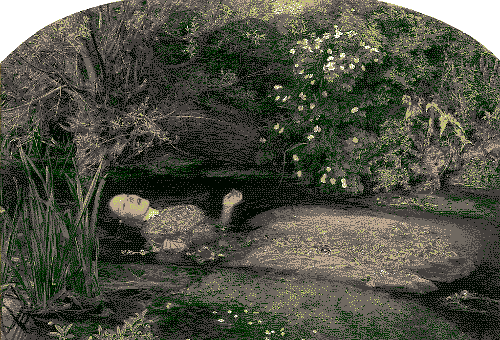



*Di(e)thered | Ophelia by John Everett Millais (1851/1852), Tate Britain (London).* 

Done with grit during the Oct. 25-25 anticlimax by [brk](github.com/brooks-code). 🕷

Thanks!